In [3]:
setwd("/home/pa/Documents/github/doc_suomi/code")
source("utils.R")
source("data_cook.R")
cat(howto_data)

`summarise()` has grouped output by 'album_id', 'name'. You can override using the `.groups` argument.



How to use datasets (Personal library)
 
call    base()             for real values
call    z_scored()         for normalized
call    min_maxed()        for normalized2
call    upsampled_album()  for binded upsamplped albums
call    low_minmax()       for min-maxed low level
call    low_z()            for normalized low level
call    low_raw()          for raw  low level

# Descriptives 

Data was converted to z-score and colapsed in three sections within each album. After that, I computed the overall mean and the standard error across all album sections. Results are displayed below.

In [6]:
data = z_scored()
head(data, 11) %>% select(!section)

album_id,album_length,track_number,valence,energy,loudness,tempo
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
006Wgzj2wMz9BX5aPYqjTr,11,1,-1.0938947,1.18375508,0.73463922,1.35072576
006Wgzj2wMz9BX5aPYqjTr,11,2,-0.2965162,-1.50152756,0.57404253,0.24468244
006Wgzj2wMz9BX5aPYqjTr,11,3,-0.4396507,-0.58714252,-0.45151284,-0.66642561
006Wgzj2wMz9BX5aPYqjTr,11,4,-0.2249489,-1.31633565,-0.04786546,-0.21856492
006Wgzj2wMz9BX5aPYqjTr,11,5,1.9638164,0.06102915,0.23506495,0.04349517
006Wgzj2wMz9BX5aPYqjTr,11,6,1.6715835,-0.14731174,-0.87078877,-0.10269692
006Wgzj2wMz9BX5aPYqjTr,11,7,0.1746350,0.91754172,0.61931140,1.64988607
006Wgzj2wMz9BX5aPYqjTr,11,8,-0.4873622,0.48928543,1.60444815,-0.66762360
006Wgzj2wMz9BX5aPYqjTr,11,9,-1.0086104,1.25320205,-0.42726167,0.23086813


In [3]:
data %>% 
    group_by(section, album_id) %>%
    summarise(valence = mean(valence),
              energy = mean(energy),
              loudness = mean(loudness),
              tempo = mean(tempo)) %>%    
    ungroup() -> media
    
media %>% 
    group_by(section) %>%
    summarise(valence = mean(valence),
              energy = mean(energy),
              loudness = mean(loudness),
              tempo = mean(tempo)) %>%    
    ungroup() %>% 
    melt(id.vars = c("section"), measure.vars = c("valence", "energy", "loudness", "tempo")) ->
    media_final

media %>% 
    group_by(section) %>%
    summarise(valence = sd(valence)/sqrt(length(valence)),
              energy = sd(energy)/sqrt(length(energy)),
              loudness = sd(loudness)/sqrt(length(loudness)),
              tempo = sd(tempo)/sqrt(length(tempo))) %>%
    ungroup() %>%
    melt(id.vars = c("section"), measure.vars = c("valence", "energy", "loudness", "tempo")) ->
    stde

media %>% 
    group_by(section) %>%
    summarise(valence = mean(valence),
              energy = mean(energy),
              loudness = mean(loudness),
              tempo = mean(tempo)) %>%
    ungroup() %>%
    melt(id.vars = c("section"), measure.vars = c("valence", "energy", "loudness", "tempo")) ->
    media

media$stde <- stde$value

`summarise()` regrouping output by 'section' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message in melt(., id.vars = c("section"), measure.vars = c("valence", "energy", :
“The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
`summarise()` ungrouping output (override with `.groups` argument)

Warning message in melt(., id.vars = c("section"), measure.vars = c("valence", "energy", :
“The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is no

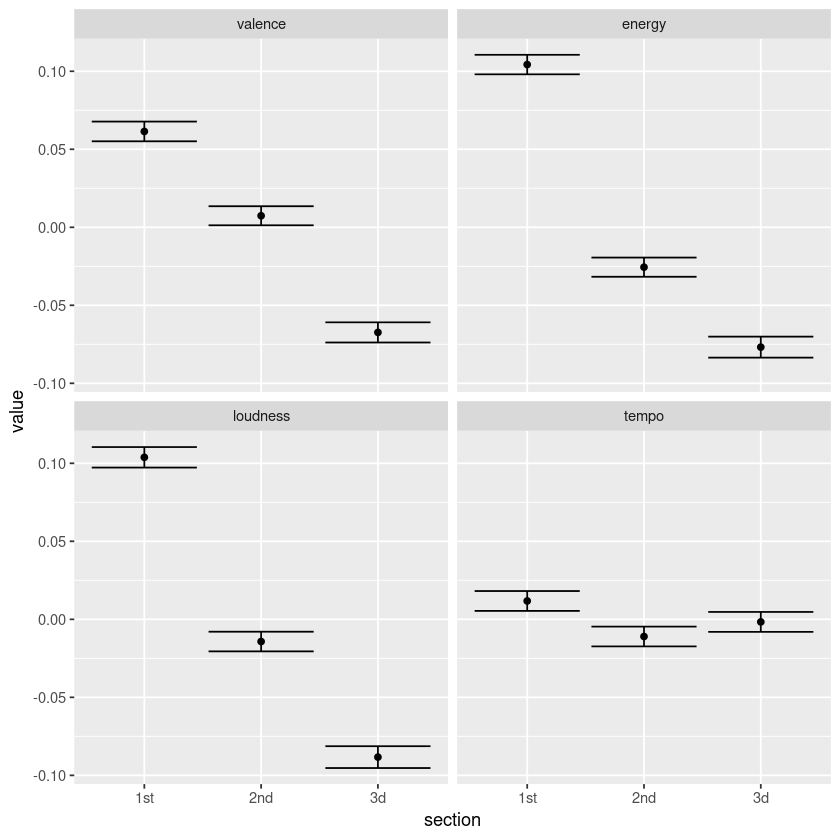

In [4]:
media %>%
    ggplot(aes(x = section, y = value))+
        facet_wrap(~variable) +
        geom_point() +
        geom_errorbar(aes(ymin = value-stde, ymax = value+stde))

*note: since means were calculated within each album, there was no imbalance on the number of tracks within each album section. Standard errors were calculated with a fixed amount of observations (number of albums in our dataset). Within each album, however, the last segment got 1 fewer track in case the album length was not divisible by 3.